In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')


#seaborn에서 제공하는 라이브러리
sns.set_style("ticks")
# sns.set_style("darkgrid")
sns.set_style("whitegrid")

#그래프를 그리기 위한 기본 설정
#폰트 설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 폰트 설정 - 맥
# plt.rcParams['font.family'] = 'AppleGothic'

#그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

#글자 크기
plt.rcParams['font.size'] = 14

#폰트 설정 시 - 기호 깨지는 것 방지하기
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.facecolor'] = 'white'

In [4]:
train_df = pd.read_csv('data/train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_df = pd.read_csv('data/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# 처리의 용이성을 위해 두 테이터 프레임을 합친다.
data = pd.concat([train_df, test_df])
#인덱스를 다시 초기화한다.
data.reset_index(inplace=True)
data

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


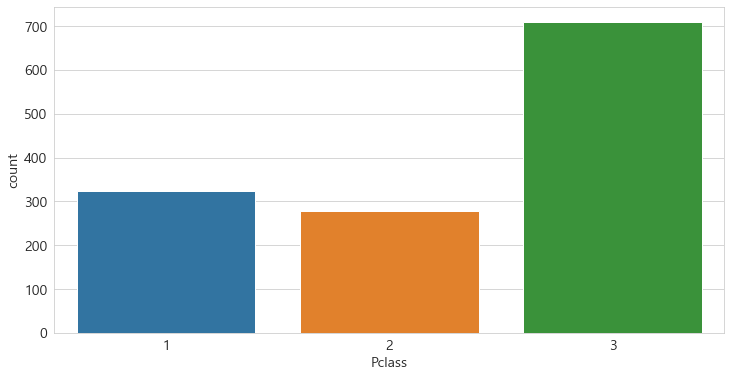

In [9]:
# 시각화
sns.countplot(x='Pclass', data=data)
plt.show()

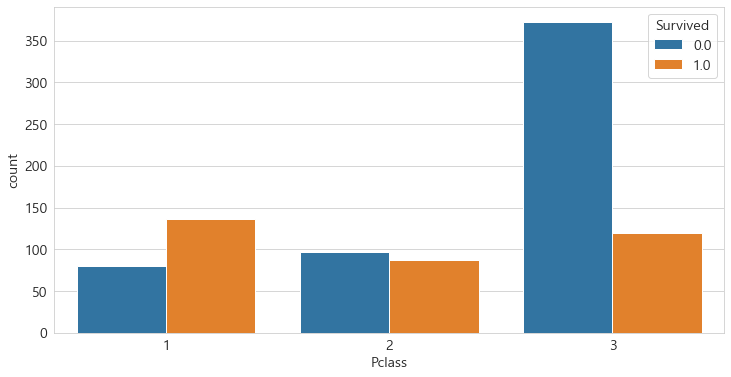

In [10]:
# 시각화
# x에 설정한 컬럼을 기준으로 그룹을 나누고 각 그룹 안에서 
## hue에 설정한 컬럼을 기준으로 그룹을 나누어 그 수를 계산해
## 시각화한다.
sns.countplot(x='Pclass', data=data, hue='Survived')
plt.show()

In [12]:
# 이름 중간의 Sir Name을 가져온다.
# ([A-Za-z]+)\. : A-Z, a-z로 구성되어 있고 마지막이 .으로 끝나는 것
data['SirName'] = data['Name'].str.extract('([A-Za-z]+)\.')
data['SirName']
#.으로 끝나지만 .은 포함되지 않음.

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: SirName, Length: 1309, dtype: object

In [14]:
#SirName을 기준으로 그룹을 묶는다.
a1 = data.groupby('SirName')
list(a1)

[('Capt',
       index  PassengerId  Survived  Pclass                          Name   Sex  \
  745    745          746       0.0       1  Crosby, Capt. Edward Gifford  male   
  
        Age  SibSp  Parch     Ticket  Fare Cabin Embarked SirName  
  745  70.0      1      1  WE/P 5735  71.0   B22        S    Capt  ),
 ('Col',
        index  PassengerId  Survived  Pclass  \
  647     647          648       1.0       1   
  694     694          695       0.0       1   
  1022    131         1023       NaN       1   
  1093    202         1094       NaN       1   
  
                                       Name   Sex   Age  SibSp  Parch    Ticket  \
  647   Simonius-Blumer, Col. Oberst Alfons  male  56.0      0      0     13213   
  694                       Weir, Col. John  male  60.0      0      0    113800   
  1022            Gracie, Col. Archibald IV  male  53.0      0      0    113780   
  1093               Astor, Col. John Jacob  male  47.0      1      0  PC 17757   
  
           Fa

In [15]:
#SirName을 기준으로 그룹을 묶는다.
a1 = data.groupby('SirName')['Age']
list(a1)

[('Capt',
  745    70.0
  Name: Age, dtype: float64),
 ('Col',
  647     56.0
  694     60.0
  1022    53.0
  1093    47.0
  Name: Age, dtype: float64),
 ('Countess',
  759    33.0
  Name: Age, dtype: float64),
 ('Don',
  30    40.0
  Name: Age, dtype: float64),
 ('Dona',
  1305    39.0
  Name: Age, dtype: float64),
 ('Dr',
  245     44.0
  317     54.0
  398     23.0
  632     32.0
  660     50.0
  766      NaN
  796     49.0
  1184    53.0
  Name: Age, dtype: float64),
 ('Jonkheer',
  822    38.0
  Name: Age, dtype: float64),
 ('Lady',
  556    48.0
  Name: Age, dtype: float64),
 ('Major',
  449    52.0
  536    45.0
  Name: Age, dtype: float64),
 ('Master',
  7        2.0
  16       2.0
  50       7.0
  59      11.0
  63       4.0
          ... 
  1251    14.5
  1270     5.0
  1280     6.0
  1283    13.0
  1308     NaN
  Name: Age, Length: 61, dtype: float64),
 ('Miss',
  2       26.0
  10       4.0
  11      58.0
  14      14.0
  22      15.0
          ... 
  1293    22.0
  1299   